# 路径

In [1]:
def setProjectPath(projectPath):
    import os
    import sys
    root=os.path.abspath(projectPath)
    print(root)
    sys.path.append(root)
    os.environ["TORCH_HOME"]=r"E:\Data\torch-model"
    import warnings  
    warnings.filterwarnings("ignore", category=RuntimeWarning, module="mne")

projectPath=r'D:\project_meta\NNproject\NNI'
setProjectPath(projectPath)

D:\project_meta\NNproject\NNI


In [2]:

datasetFolder=r'D:\dataset\driver_dataset\DROZY\DROZY'
outputFolder=r'D:\project_meta\NNproject\NNI\output'
from project.dataprocess.FolderTree import *
datasetDict=getDataPath(datasetFolder)
outputDict=getOutPath(outputFolder)
import pprint
pprint.pprint(datasetDict)
pprint.pprint(outputDict)

{'annotation_auto_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\annotations-auto',
 'annotation_manual_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\annotations-manual',
 'kinect_file': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\kinect-intrinsics.yaml',
 'kss_file': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\KSS.txt',
 'psg_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\psg',
 'pvt_rt_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\pvt-rt',
 'videos_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\videos_i8'}
{'ECG_filted_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\psg_filted\\ECG',
 'ECG_table_file': 'D:\\project_meta\\NNproject\\NNI\\output\\ECG_table.csv',
 'ECG_uniformfilted_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\psg_filted\\ECG',
 'EEG_filted_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\psg_filted\\EEG',
 'EEG_table_file': 'D:\\project_meta\\NNproject\\NNI\\output\\EEG_table.csv',
 'EEG_uniformfilted_folder': 'D:\\project_

In [3]:
edfList=os.listdir(datasetDict['psg_folder'])
print('number of edf file:',len(edfList))
edfFullFilename=os.path.join(datasetDict['psg_folder'],edfList[0])
print(edfFullFilename)

number of edf file: 36
D:\dataset\driver_dataset\DROZY\DROZY\psg\1-1.edf


In [4]:
edffile=mne.io.read_raw_edf(edfFullFilename,verbose=False)
import pandas as pd
print(edffile.info['ch_names'])

['Fz', 'Cz', 'C3', 'C4', 'Pz', 'Oz', 'Cam-Sync', 'PVT', 'EOG-V', 'EOG-H', 'EMG', 'ECG']


In [5]:
print(len(edffile[['Fz', 'Cz', 'C3', 'C4']]))


2


# ecg数据

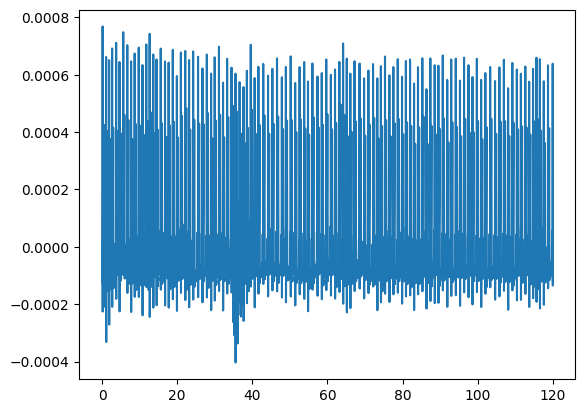

In [6]:
import matplotlib.pyplot as plt
startTime=int(0*512)
endTime=int(120*512)
plt.plot(edffile[['ECG']][1][startTime:endTime],-1*edffile[['ECG']][0][:,startTime:endTime].T)


## 去噪

In [7]:
zaoyin=mne.filter.filter_data(-1*edffile[['ECG']][0],512,l_freq=0,h_freq=0.01)

Setting up low-pass filter at 0.01 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 0.01 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.01 Hz)
- Filter length: 845 samples (1.650 s)



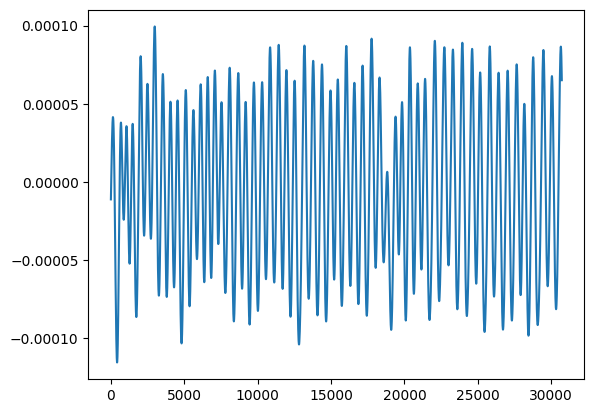

In [8]:
plt.plot(zaoyin[0][:60*512].T)

In [9]:
EEGData=-1*edffile[['ECG']][0]-zaoyin[0]

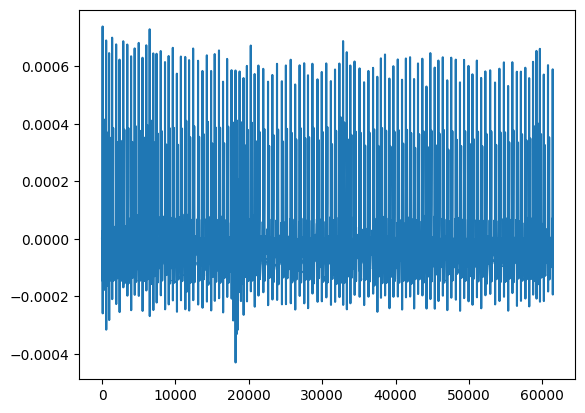

In [10]:
plt.plot(EEGData[0][startTime:endTime].T)

# 提取R峰

In [11]:
import sys
import time
import logging
import numpy as np
from biosppy.signals import ecg
from biosppy.storage import load_txt
import matplotlib.pyplot as plt


In [12]:
t=edffile[['ECG']][1]
t

array([0.00000000e+00, 1.95312500e-03, 3.90625000e-03, ...,
       5.99994141e+02, 5.99996094e+02, 5.99998047e+02])

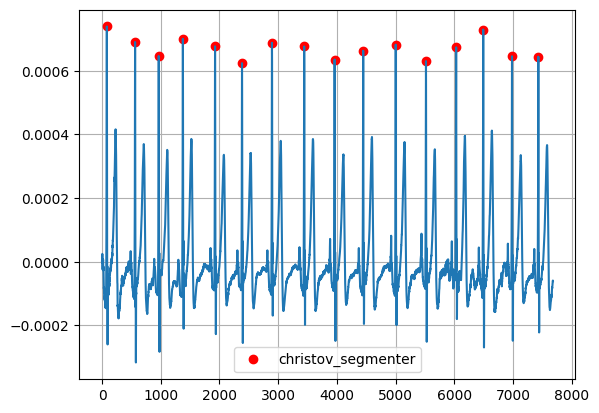

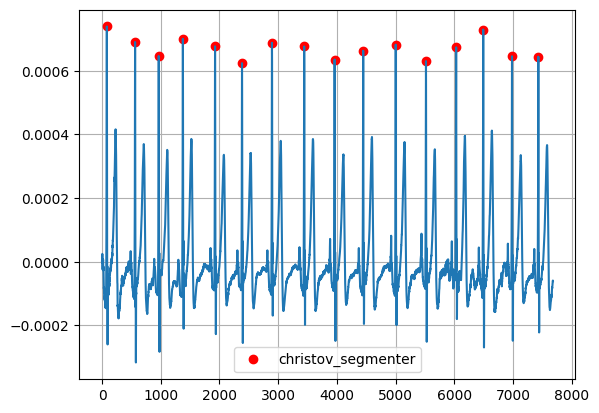

In [13]:
signal=EEGData[0][0:15*512].T
t=edffile[['ECG']][1][0:15*512]
sfreq=512
rpeaks0=ecg.hamilton_segmenter(signal,sfreq)
rpeaks1=ecg.hamilton_segmenter(-1*signal,sfreq)
plt.figure()
plt.grid(True)
plt.plot(rpeaks0[0], signal[rpeaks0[0]], "ro", label="christov_segmenter")
plt.plot(signal)
plt.legend()
plt.show()
plt.figure()
plt.grid(True)
plt.plot(rpeaks1[0], signal[rpeaks1[0]], "ro", label="christov_segmenter")
plt.plot(signal)
plt.legend()
plt.show()

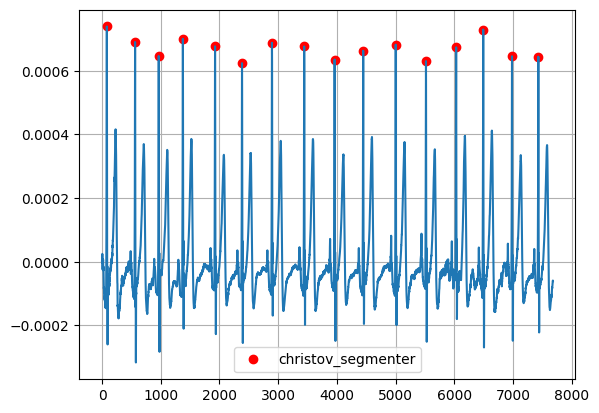

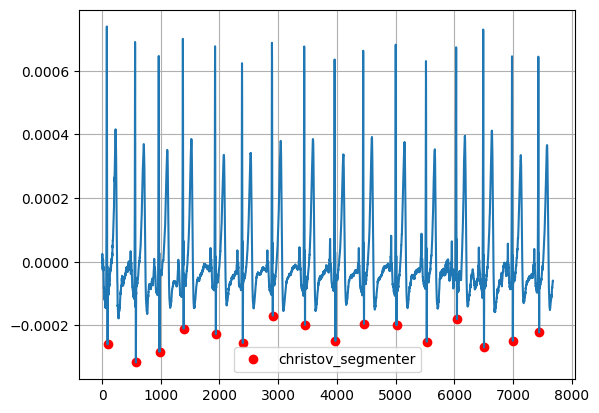

In [14]:
signal=EEGData[0][0:15*512].T
sfreq=512
rpeaks0=ecg.christov_segmenter(signal,sfreq)
rpeaks1=ecg.christov_segmenter(-1*signal,sfreq)
plt.figure()
plt.grid(True)
plt.plot(rpeaks0[0], signal[rpeaks0[0]], "ro", label="christov_segmenter")
plt.plot(signal)
plt.legend()
plt.show()
plt.figure()
plt.grid(True)
plt.plot(rpeaks1[0], signal[rpeaks1[0]], "ro", label="christov_segmenter")
plt.plot(signal)
plt.legend()
plt.show()

## 校正方向

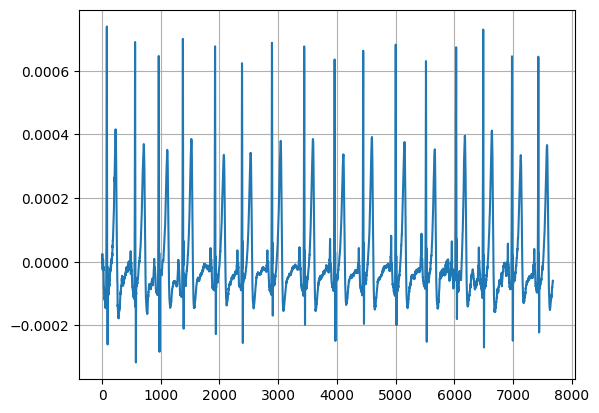

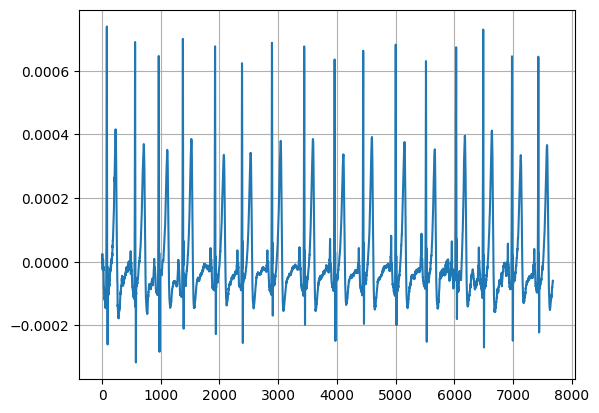

In [15]:
signal=EEGData[0][0:15*512].T
plt.figure()
plt.grid(True)
plt.plot(signal)
plt.show()
sfreq=512
rpeaks0=ecg.christov_segmenter(signal,sfreq)
rpeaks1=ecg.christov_segmenter(-1*signal,sfreq)
if sum(signal[rpeaks0[0]])<sum(-1*signal[rpeaks1[0]]):
    signal=-1*signal
plt.figure()
plt.grid(True)
plt.plot(signal)
plt.show()

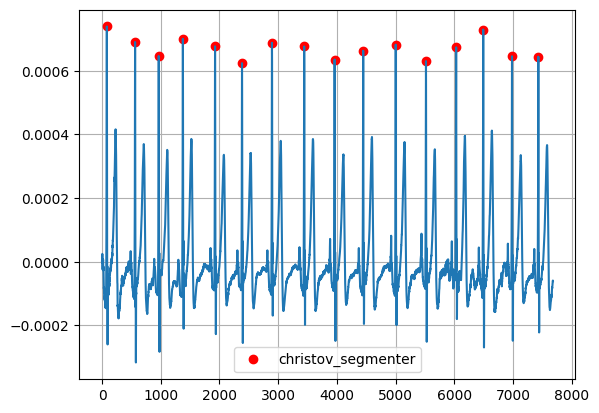

In [16]:
plt.figure()
plt.grid(True)
plt.plot(rpeaks0[0], signal[rpeaks0[0]], "ro", label="christov_segmenter")
plt.plot(signal)
plt.legend()
plt.show()

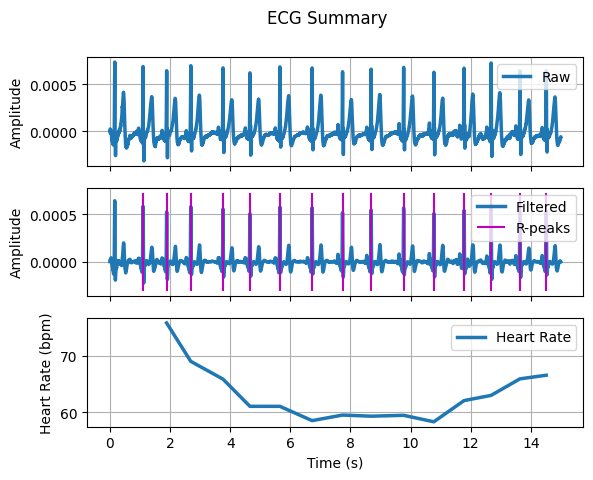

In [17]:
result=ecg.ecg(signal,sfreq)

In [18]:
result_dict=result.as_dict()

In [19]:
result_dict.keys()

odict_keys(['ts', 'filtered', 'rpeaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate'])

In [20]:
np.diff(result_dict['rpeaks'])/512*1000

array([ 785.15625 ,  802.734375, 1072.265625,  896.484375,  996.09375 ,
       1072.265625, 1011.71875 ,  949.21875 , 1083.984375, 1003.90625 ,
       1003.90625 ,  900.390625,  958.984375,  875.      ])

In [21]:
result_dict['heart_rate_ts']

array([ 1.88476562,  2.6875    ,  3.75976562,  4.65625   ,  5.65234375,
        6.72460938,  7.73632812,  8.68554688,  9.76953125, 10.7734375 ,
       11.77734375, 12.67773438, 13.63671875, 14.51171875])

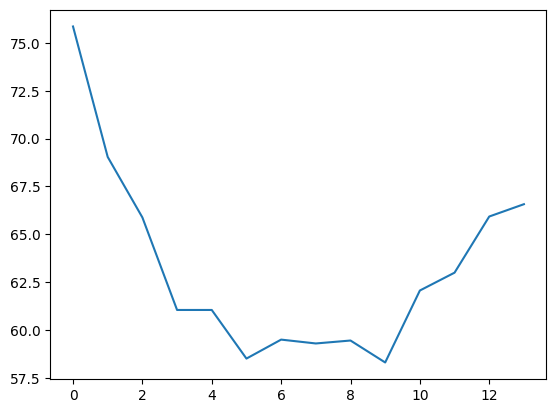

In [22]:
plt.plot(result_dict['heart_rate'])

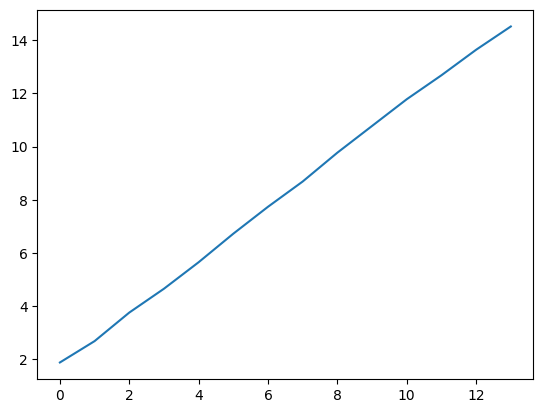

In [23]:
plt.plot(result_dict['heart_rate_ts'])

<Axes: >

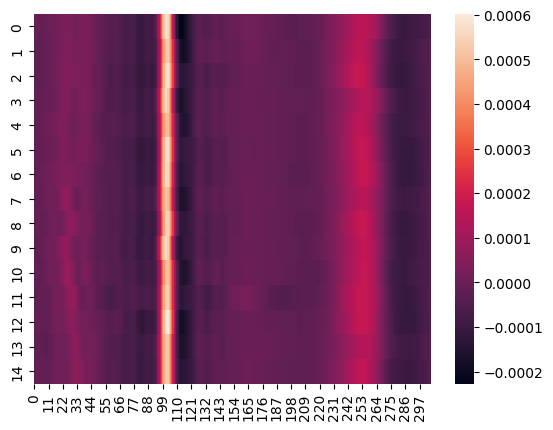

In [24]:
import seaborn as sns
sns.heatmap(result_dict['templates'])

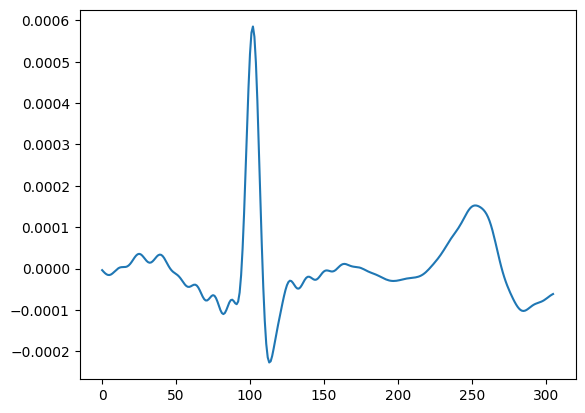

In [25]:
import pandas as pd
plt.plot(result.as_dict()['templates'][0].T)

In [26]:
result.as_dict()['templates'].shape

(15, 306)

In [27]:
from torchvision.datasets import ImageFolder
dataset=ImageFolder(r'D:\project_meta\NNproject\NNI\output\video_frames\IDFolder')
dataset[1000][0].show()

In [28]:
np.diff(result_dict['rpeaks'])/512*1000

array([ 785.15625 ,  802.734375, 1072.265625,  896.484375,  996.09375 ,
       1072.265625, 1011.71875 ,  949.21875 , 1083.984375, 1003.90625 ,
       1003.90625 ,  900.390625,  958.984375,  875.      ])

In [29]:
from hrvanalysis import get_time_domain_features
get_time_domain_features(np.diff(result_dict['rpeaks'])/512*1000)

{'mean_nni': 958.0078125,
 'sdnn': 95.51053153574104,
 'sdsd': 115.12766863382222,
 'nni_50': 11,
 'pnni_50': 84.61538461538461,
 'nni_20': 11,
 'pnni_20': 84.61538461538461,
 'rmssd': 115.33491580386911,
 'median_nni': 977.5390625,
 'range_nni': 298.828125,
 'cvsd': 0.12039037082891128,
 'cvnni': 0.09969702782120166,
 'mean_hr': 63.2437920125524,
 'max_hr': 76.41791044776119,
 'min_hr': 55.351351351351354,
 'std_hr': 6.419919327580528}

In [30]:
from hrvanalysis import get_frequency_domain_features
frequency_domain_features = get_frequency_domain_features(np.diff(result_dict['rpeaks'])/512*1000)
frequency_domain_features

g:\install\anaconda\envs\nni\lib\site-packages\scipy\signal\_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 51, using nperseg = 51
  warnings.warn('nperseg = {0:d} is greater than input length '


{'lf': 1099.2429862811887,
 'hf': 1228.8823509655767,
 'lf_hf_ratio': 0.8945062848510065,
 'lfnu': 47.215799282574295,
 'hfnu': 52.7842007174257,
 'total_power': 3100.266378954939,
 'vlf': 772.1410417081736}

In [31]:
# 计算给定数据的样本熵，必须在一分钟内的短期窗口使用
from hrvanalysis import get_sampen
sampen = get_sampen(np.diff(result_dict['rpeaks'])/512*1000)
# 返回如下键值：
sampen    

{'sampen': inf}

In [32]:
import nolds
nolds.sampen(signal)

0.09525658500573154

In [33]:
from project.dataprocess.SignalProcess import *
fft_result,freq=FFTParse(signal,512)

In [55]:
np.array([[1],[2]]).shape

(2, 1)

In [84]:
pywt.wavelist('cgau')

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8']

(400, 7680)
0.10000000000000142


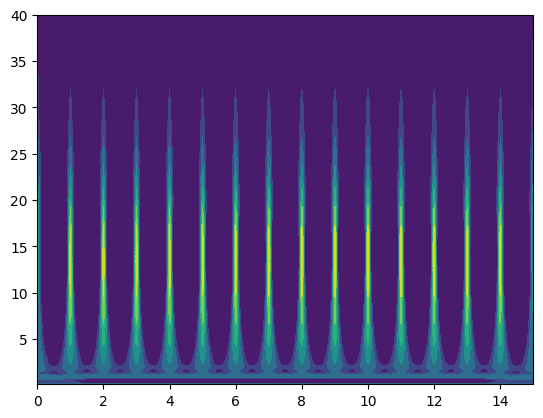

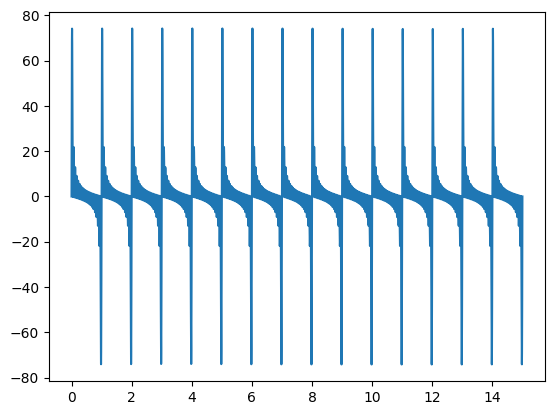

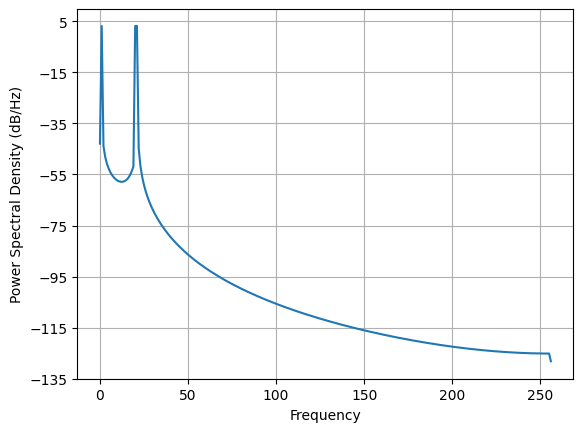

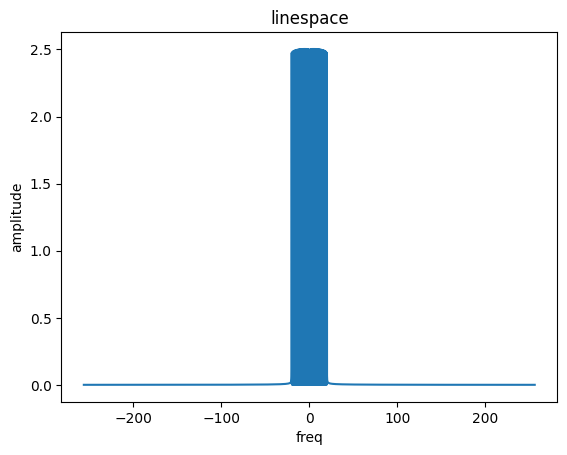

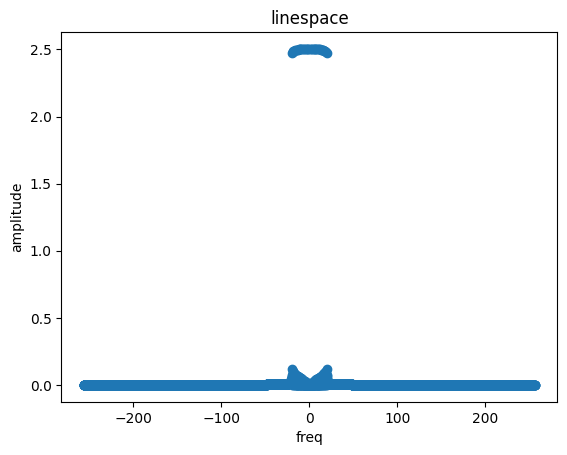

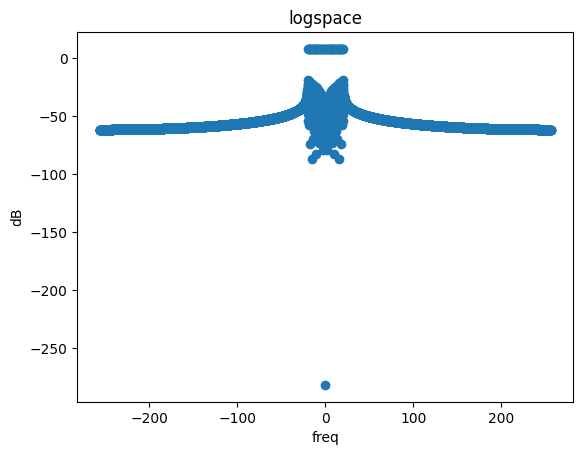

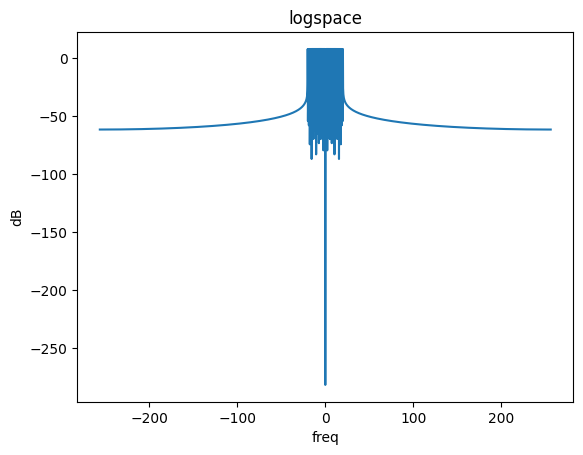

In [220]:
x,y,power=CreateSignal(A=5,length=15)
# np.sum(np.sin(2*np.pi*x*np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14]])),axis=0)
data=y

k=1
sampling_rate=512
totalscal = k*sampling_rate
wavename = 'cgau5'
highest_frequency=40
resolution_ratio=0.1
fc = pywt.central_frequency(wavename)  # 计算小波函数的中心频率
cparam = 2 * fc * totalscal  # 常数c\
highest_frequency=2*k*highest_frequency
resolution_ratio=-1*(resolution_ratio*2)
scales=cparam/np.arange(highest_frequency, 0.01, resolution_ratio)  # 为使转换后的频率序列是一等差序列，尺度序列必须取为这一形式（也即小波尺度）
[cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0/sampling_rate)  # 连续小波变换模块
print(cwtmatr.shape)
print(frequencies[0]-frequencies[1])
plt.figure()
plt.contourf(x, frequencies, abs(cwtmatr))

plt.figure()
plt.plot(x,(y))
np.sum(cwtmatr,axis=1)
sum(np.sum(abs(cwtmatr),axis=1))**2
plt.figure()
result=plt.psd(y,Fs=512,NFFT=512)
fft_result,freq=FFTParse(y,512)
PlotAFR(fft_result,freq)

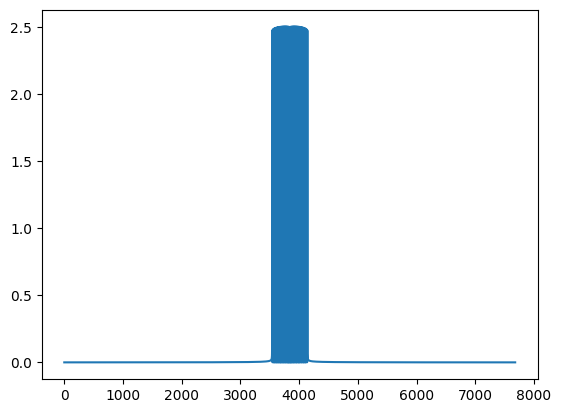

In [212]:
plt.plot(abs(fft_result))

In [204]:
freq>1 and freq<25

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [177]:
sum(result[0]**2),power

(13.06824413446636, 250.0)

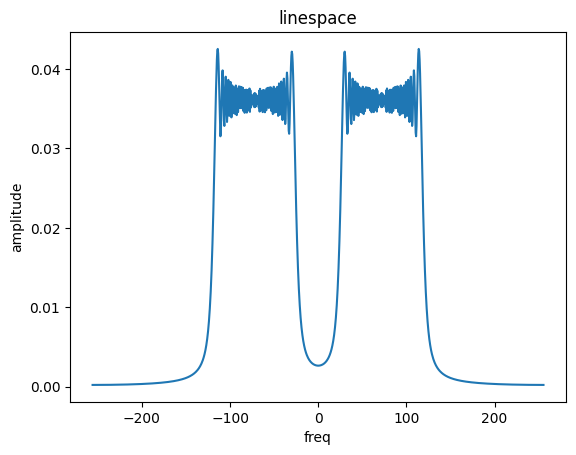

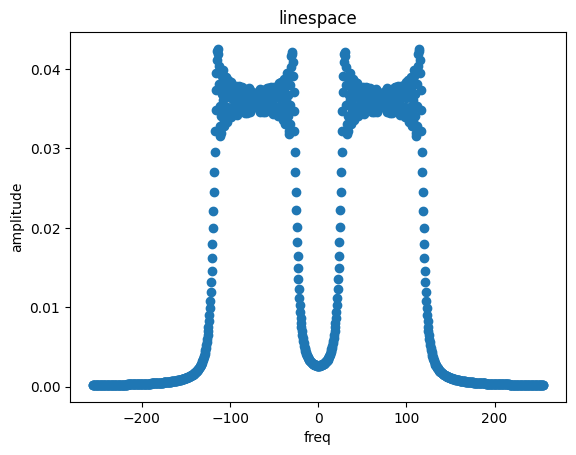

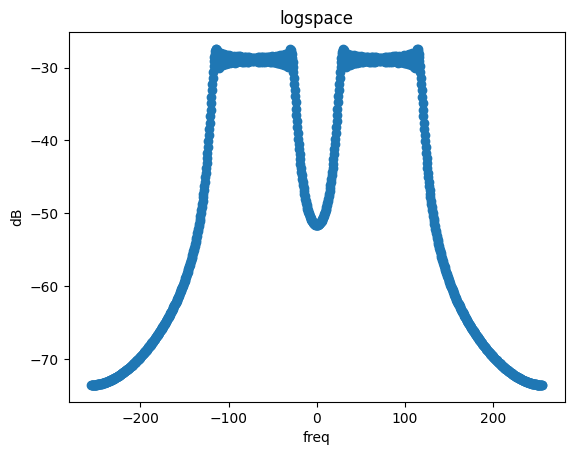

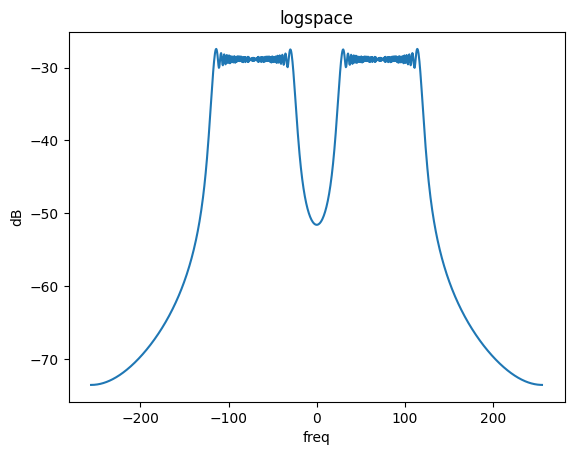

In [193]:
fs = 2**6     # 采样频率
dt = 1/fs     # 时间精度
timestart = -8    # 信号开始时间
timeend = 8     # 信号结束时间
t = np.arange(timestart, timeend, dt)   # 时间序列
L = len(t)   # 信号长度
def FFTParse(y,sfreq):
    '''
    对信号进行fft变换，生成双边序列
    输入：
        y:时间序列
        sfreq:采样频率
    输出：
        fft_result:幅值双边序列
        freq:频率双边序列
    '''
    fft_result=np.fft.fftshift(np.fft.fft(y))/len(y)
    freq=np.fft.fftshift(np.fft.fftfreq(len(y),1/sfreq))

    return fft_result,freq
# 构造信号
z = 1*np.sin(2*np.pi*np.linspace(6, 12, L)*t)
fft_result,freq=FFTParse(z,sfreq=512)
PlotAFR(fft_result,freq)

In [178]:
len(result[0])

257

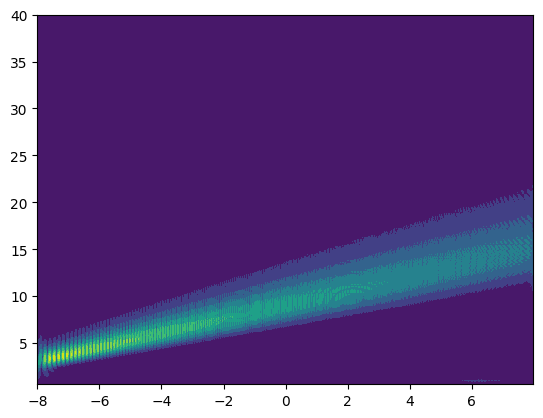

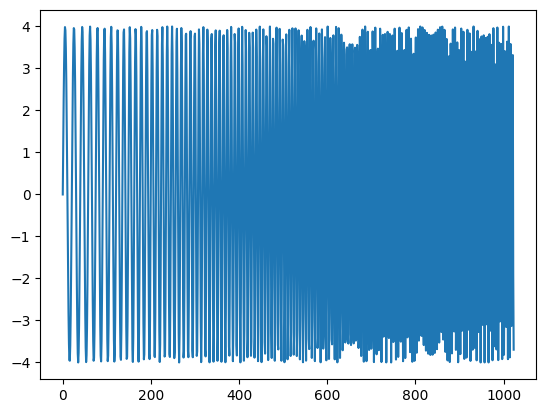

In [151]:
# getCWTImage(signal,t,highest_frequency=0.4,resolution_ratio=0.1)
# 定义信号信息
fs = 2**6     # 采样频率
dt = 1/fs     # 时间精度
timestart = -8    # 信号开始时间
timeend = 8     # 信号结束时间
t = np.arange(timestart, timeend, dt)   # 时间序列
L = len(t)   # 信号长度

# 构造信号
z = 4*np.sin(2*np.pi*np.linspace(6, 12, L)*t)
data=z
totalscal = 2**6
sampling_rate=2**6
wavename = 'morl'
highest_frequency=40
resolution_ratio=0.1
fc = pywt.central_frequency(wavename)  # 计算小波函数的中心频率
cparam = 2 * fc * totalscal  # 常数c\
highest_frequency=2*highest_frequency
resolution_ratio=-2*(resolution_ratio*2)
scales=cparam/np.arange(highest_frequency, 1, resolution_ratio)  # 为使转换后的频率序列是一等差序列，尺度序列必须取为这一形式（也即小波尺度）
[cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0/sampling_rate)  # 连续小波变换模块
plt.contourf(t, frequencies, abs(cwtmatr))
plt.figure()
plt.plot(z)
# for i in range(len(cwtmatr[0])):
#     print(cwtmatr[0][i])

(array([3.48220016e+01, 1.84423380e+01, 2.86981509e-01, 4.49588325e-02,
        9.72876426e-03, 1.44654296e-03, 1.28574091e-04, 6.21042488e-03,
        5.95991543e-02, 1.71031795e+00, 2.76664471e+01, 1.32742945e+01,
        7.60790619e-02, 1.24597984e-02, 3.43467875e-03, 1.23849543e-03,
        5.27480773e-04, 2.51882217e-04, 1.30823258e-04, 7.24904516e-05,
        4.22957515e-05, 2.57445117e-05, 1.62350026e-05, 1.05516302e-05,
        7.03889127e-06, 4.80379303e-06, 3.34506301e-06, 2.37143529e-06,
        1.70847504e-06, 1.24888619e-06, 9.25078691e-07, 6.93554010e-07,
        5.25771420e-07, 4.02672401e-07, 3.11324328e-07, 2.42821181e-07,
        1.90946008e-07, 1.51304153e-07, 1.20752692e-07, 9.70193836e-08,
        7.84447412e-08, 6.38052473e-08, 5.21907588e-08, 4.29185563e-08,
        3.54724632e-08, 2.94593037e-08, 2.45774768e-08, 2.05940787e-08,
        1.73281132e-08, 1.46380741e-08, 1.24126935e-08, 1.05640012e-08,
        9.02208373e-09, 7.73110026e-09, 6.64623743e-09, 5.731367

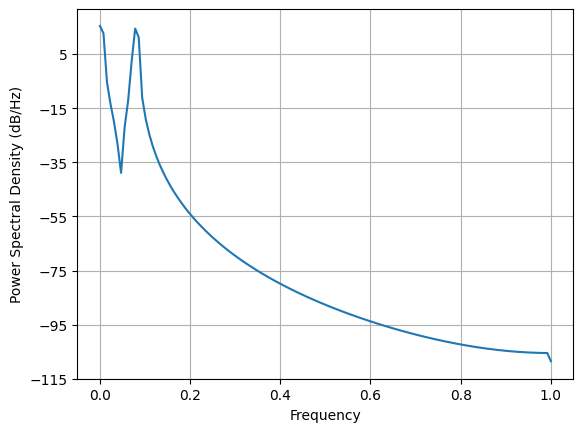

In [156]:
import matplotlib.pyplot as plt
plt.psd(y)

In [35]:
np.diff(frequencies),frequencies


(array([-0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01,
        -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01,
        -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01,
        -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01,
        -0.01, -0.01, -0.01]),
 array([0.4 , 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3 ,
        0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.19,
        0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.08,
        0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]))

In [36]:
np.sum(cwtmatr,axis=1)
BandPower(np.sum(cwtmatr,axis=1),frequencies,min=0.04,max=0.15)

0.0002681207301875955

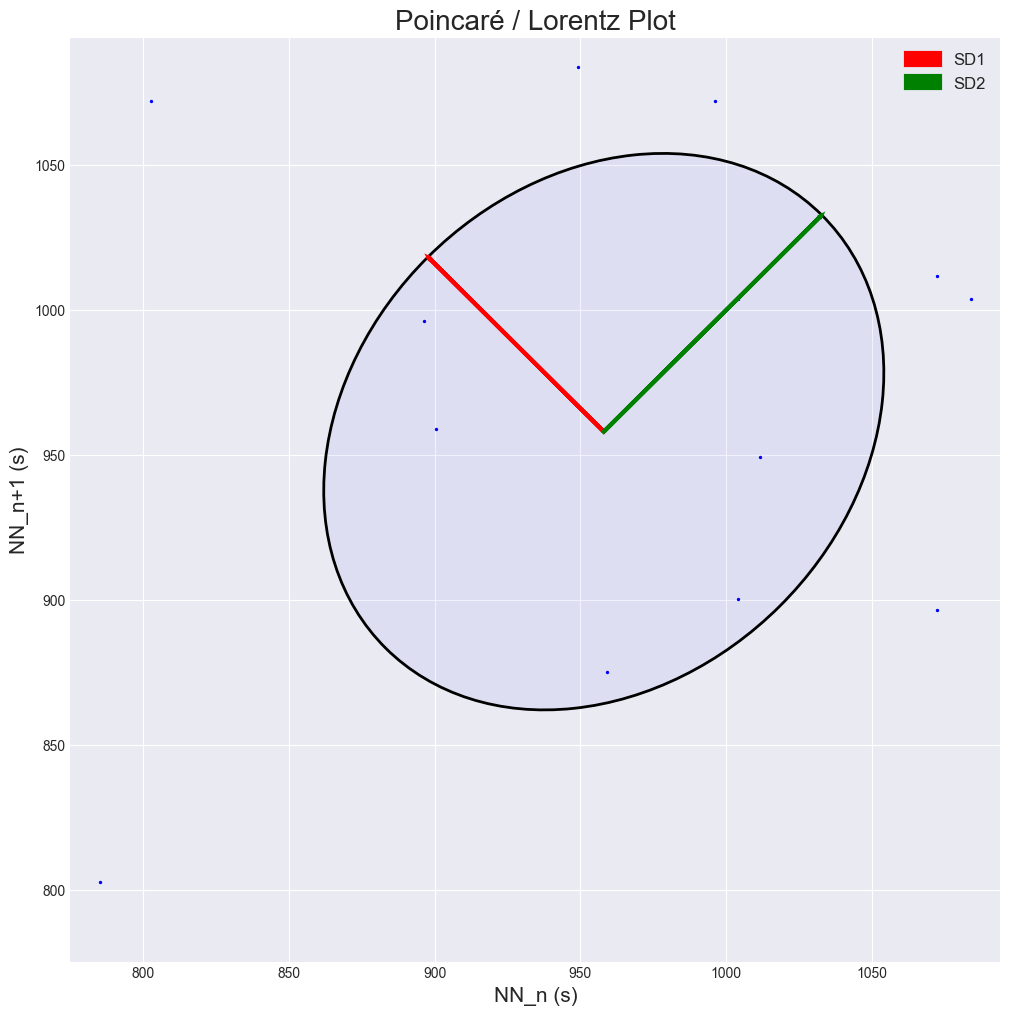

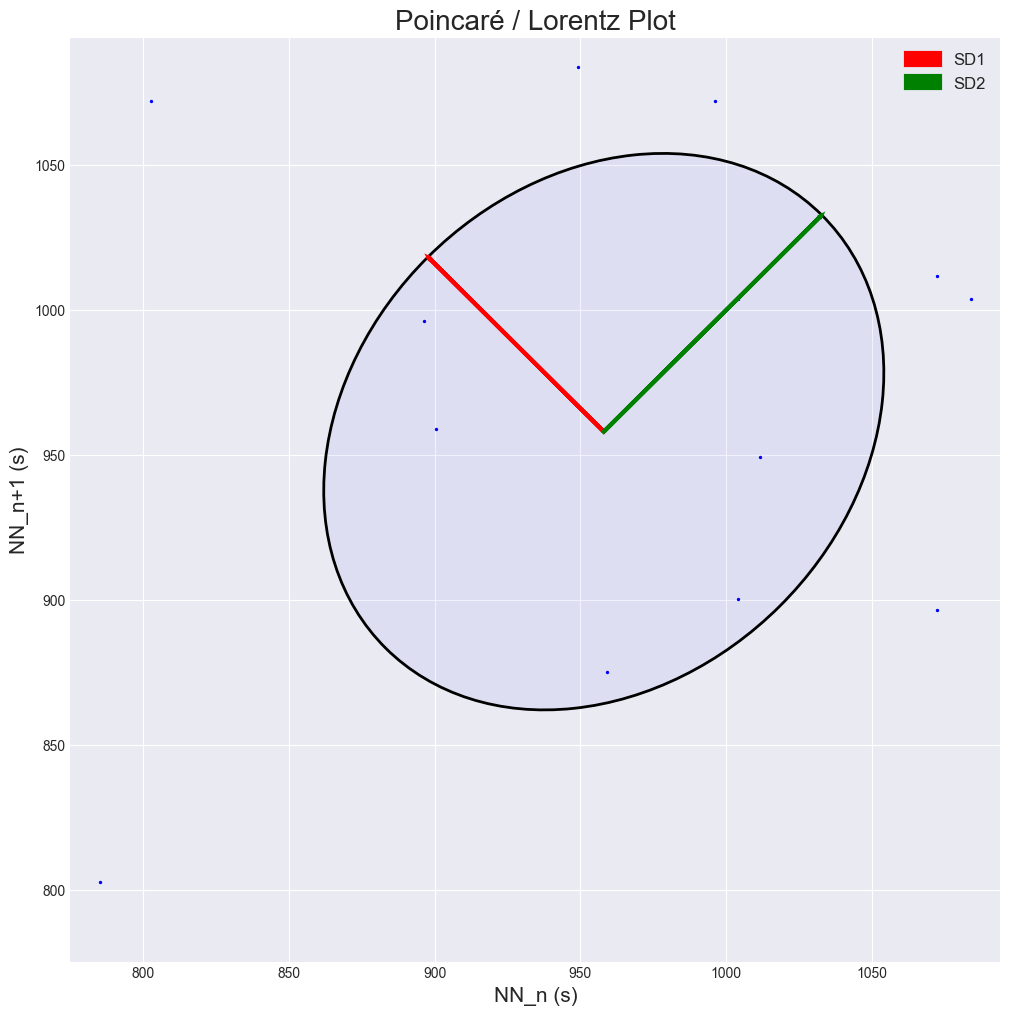

In [50]:
from hrvanalysis import plot_poincare


plot_poincare(np.diff(result_dict['rpeaks'])/512*1000)
plot_poincare(np.diff(result_dict['rpeaks'])/512*1000, plot_sd_features=True)